# Project 2 - 80s Movie Data

In [106]:
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from imdb_big_scrape import get_movie_links
from getting_info import get_movie_data
from sklearn.linear_model import LinearRegression
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
list1 = get_movie_links(10)
# Collect movie links

In [49]:
len(list1[:100])

100

In [158]:
movie_page_info_list = []
for link in list1[:5]:
    movie_page_info_list.append(get_movie_data(link))
# Create list with all movies from movie links

In [160]:
len(movie_page_info_list)

5

In [161]:
movie_page_info_2 = pd.DataFrame(movie_page_info_list)

In [162]:
movie_page_info_2['mpaa'].unique()

array([None, &lt;a href=&quot;/mpaa&quot;&gt;MPAA&lt;/a&gt;], dtype=object)

In [54]:
movie_page_info = pd.DataFrame(movie_page_info_list)
movie_page_info.set_index('movie title', inplace=True)
# Turn list into DataFrame

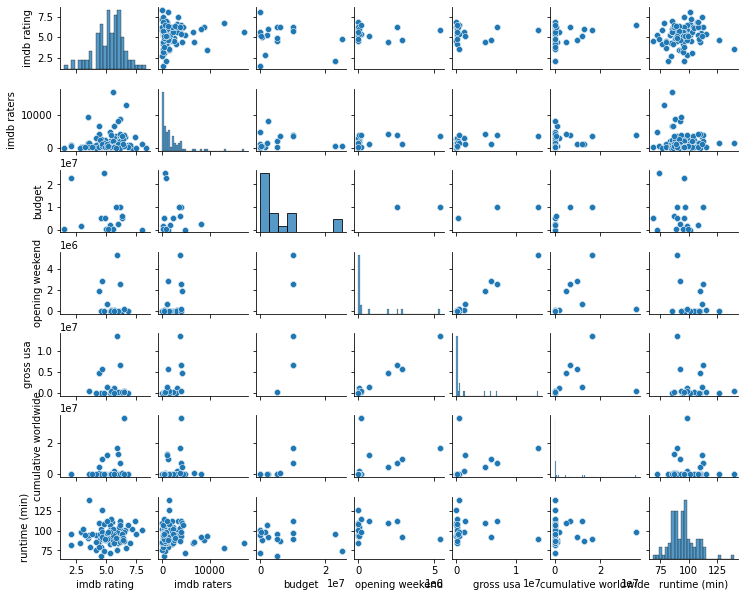

In [73]:
sns.pairplot(movie_page_info, height=1.2, aspect=1.25);

In [108]:
movie_page_info_drop = movie_page_info.dropna(subset=['runtime (min)'])

In [111]:
movie_page_info_dummy = pd.get_dummies(movie_page_info['mpaa'])

In [124]:
movie_page_info[movie_page_info['mpaa']=='Romance']

,imdb rating,imdb raters,mpaa,genres,director,writer,stars,country,language,release date,budget,opening weekend,gross usa,cumulative worldwide,production companies,runtime (min)
movie title,,,,,,,,,,,,,,,,
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN
From the Heart,7.1,31,Romance,[Romance],Sandra L. Martin,D.F.W. Buckingham,"[Galadriel Stineman, Kevin Joy, Jonathan Patri...",USA,English,2020-02-21,NaN,NaN,NaN,NaN,[From The Heart],NaN


In [156]:
movie_page_info_dummy.head()

,,Not Rated,PG,PG-13,R,Romance,TV-14,TV-MA,TV-PG,Thriller,Unrated
movie title,,,,,,,,,,,
Broil,1,0,0,0,0,0,0,0,0,0,0
The Coming,1,0,0,0,0,0,0,0,0,0,0
After Midnight,0,0,0,0,0,0,0,1,0,0,0
The Vigil,0,0,0,1,0,0,0,0,0,0,0
Poms,0,0,0,1,0,0,0,0,0,0,0


In [155]:
lr = LinearRegression()

X = movie_page_info_dummy[['runtime (min)']]

y = movie_page_info_dummy['imdb rating']

lr.fit(X, y)

KeyError: &quot;None of [Index([&#39;runtime (min)&#39;], dtype=&#39;object&#39;)] are in the [columns]&quot;

In [ ]:
lr = LinearRegression()

X = movie_page_info_drop[['runtime (min)']]

y = movie_page_info_drop['imdb rating']

lr.fit(X, y)

In [110]:
lr.score(X, y)

0.016491660093727933

In [92]:
movie_page_info['imdb rating'].head()

movie title
Broil             5.2
The Coming        1.5
After Midnight    5.3
The Vigil         5.8
Poms              5.9
Name: imdb rating, dtype: float64

In [98]:
movie_page_info['imdb rating']

movie title
Broil                        5.2
The Coming                   1.5
After Midnight               5.3
The Vigil                    5.8
Poms                         5.9
                            ... 
Little Women                 5.1
The Matchmaker&#39;s Playbook    6.4
2 Minutes of Fame            5.1
Butt Boy                     5.2
The Voices                   3.8
Name: imdb rating, Length: 1000, dtype: float64